In [1]:
# dataset
import numpy as np
import matplotlib.pyplot as plt
import random

In [7]:
def get_column(data, index):
    result = [row[index] for row in data]
    return result

def prepare_data(file_name_dataset):
  data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

  # get tv (index=0)
  tv_data = get_column(data, 0)

  # get radio (index=1)
  radio_data = get_column(data, 1)

  # get newspaper (index=2)
  newspaper_data = get_column(data, 2)

  # get sales (index=3)
  sales_data = get_column(data, 3)

  # building X input  and y output for training
  #Create list of features for input
  X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
  y = sales_data
  return X,y

In [2]:
def initialize_params():
    bias = 0
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)
    
    return [0, 0.016992259082509283, 0.0070783670518262355, -0.002307860847821344]
    # return [bias, w1, w2, w3] 

In [10]:
#Predict ouput by using y = x0*b + x1*w1 + x2*w2 + x3*w3

def predict(X_features, weights):
    #your code here *************************
    result = sum(x * w for x, w in zip(X_features, weights))
    return result

def compute_loss(y_hat, y):
    return (y_hat - y)**2

# compute gradient
def compute_gradient_w(X_features, y, y_hat):
    #your code here *************************
    dl_dweights = [2 * xi * (y_hat - y) for xi in X_features]
    return dl_dweights 

# update weights
def update_weight(weights, dl_dweights, lr):
    #your code here *************************
    weights = [w - lr * dw for w, dw in zip(weights, dl_dweights)]
    return weights    

In [11]:
def implement_linear_regression(X_feature, y_ouput, epoch_max = 50,lr = 1e-5):

  losses = []
  weights = initialize_params()
  N = len(y_ouput)
  for epoch in range(epoch_max):
      print("epoch", epoch)
      for i in range(N):
          # get a sample - row i     
          features_i = X_feature[i]
          y = y_ouput[i]
          
          # compute output 
          y_hat = predict(features_i, weights)

          # compute loss
          loss = compute_loss(y, y_hat)

          # compute gradient w1, w2, w3, b
          dl_dweights = compute_gradient_w(features_i, y, y_hat)

          # update parameters
          weights = update_weight(weights, dl_dweights, lr)

          # logging
          losses.append(loss) 
  return weights, losses

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49


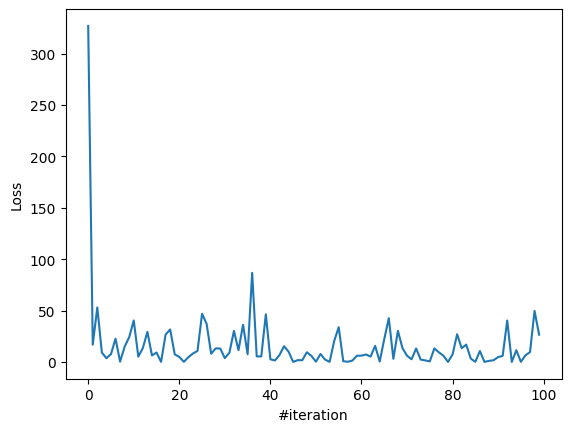

In [12]:
X,y = prepare_data('advertising.csv')
W,L = implement_linear_regression(X,y)
plt.plot(L[0:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

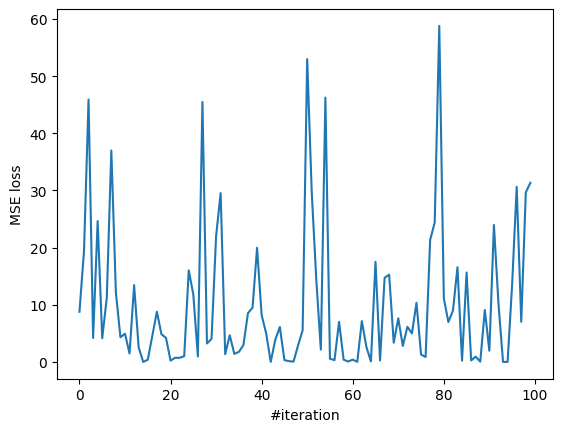

In [13]:
plt.plot(L[-100:])
plt.xlabel("#iteration")
plt.ylabel("MSE loss")
plt.show()

In [14]:
#Multiple choices:
#Question 12:
X,y = prepare_data('advertising.csv')
W,L = implement_linear_regression(X,y)
# Print loss value at interation 9999
print(L[9999])

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49
31.338878034644296


In [15]:
def min_max_scaling(data1, data2, data3):
    max_data_1 = max(data1)
    max_data_2 = max(data2)
    max_data_3 = max(data3)

    min_data_1 = min(data1)
    min_data_2 = min(data2)
    min_data_3 = min(data3)

    data1 = [(x - min_data_1) / (max_data_1 - min_data_1) for x in data1]
    data2 = [(x - min_data_2) / (max_data_2 - min_data_2) for x in data2]
    data3 = [(x - min_data_3) / (max_data_3 - min_data_3) for x in data3]

    return (data1, data2, data3)

In [16]:
def get_column(data, index):
    result = [row[index] for row in data]
    return result

def prepare_data_v2(file_name_dataset):
  data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

  # get tv (index=0)
  tv_data = get_column(data, 0)

  # get radio (index=1)
  radio_data = get_column(data, 1)

  # get newspaper (index=2)
  newspaper_data = get_column(data, 2)

  tv_data, radio_data, newspaper_data = min_max_scaling(tv_data, radio_data, newspaper_data)

  # get sales (index=3)
  sales_data = get_column(data, 3)

  # building X input  and y output for training
  #Create list of features for input
  X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
  y = sales_data
  return X,y

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49


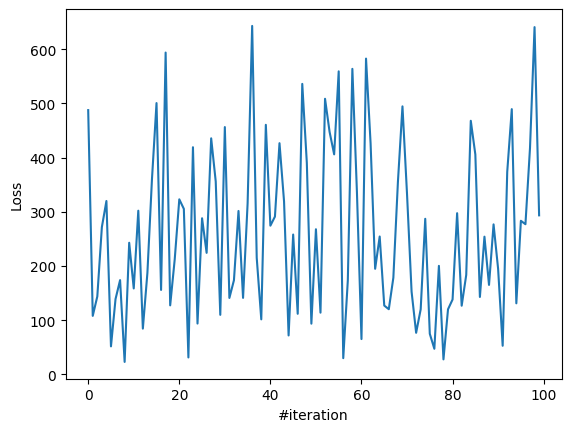

In [17]:
X,y = prepare_data_v2('advertising.csv')
W,L = implement_linear_regression(X,y)
plt.plot(L[0:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

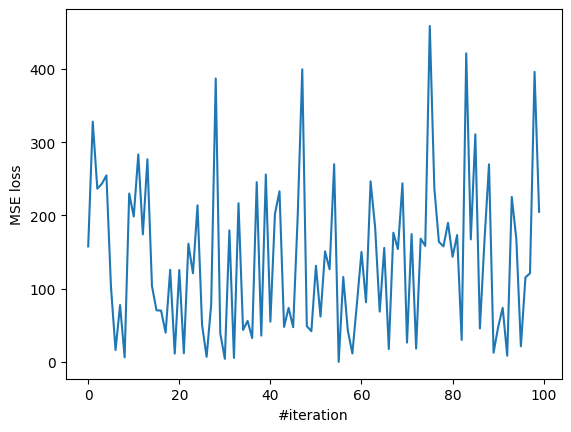

In [18]:
plt.plot(L[-100:])
plt.xlabel("#iteration")
plt.ylabel("MSE loss")
plt.show()

In [19]:
X,y = prepare_data('advertising.csv')
W,L = implement_linear_regression(X,y)
# Print loss value at interation 9999
print(L[9999])

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49
31.338878034644296
